# Which genes are significantly different between basal and non-basal tumors?

In [1]:
import pandas as pd

df = pd.read_csv("breastcancer.csv", index_col=0)
df.head()

,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
samples,,,,,,,,,,,,,,,,,,,,,
84,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,8.870780,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
85,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,7.767646,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
87,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,9.417956,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
90,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,9.022345,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
91,basal,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,9.400056,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947


In [2]:
labels = []
for col in df.columns:
    if "Basal" in col:
        labels.append("Basal")
    else:
        labels.append("Non-Basal")


In [3]:
X = df.T


In [4]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

labels = X.loc['type']

X_features_rows = X.drop('type', axis=0)

X_features_rows = X_features_rows.apply(pd.to_numeric, errors='coerce')

X_for_scaler = X_features_rows.T

X_scaled = StandardScaler().fit_transform(X_for_scaler)

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pcs = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(
    pcs,
    columns=["PC1", "PC2"]
)

pca_df["Subtype"] = labels


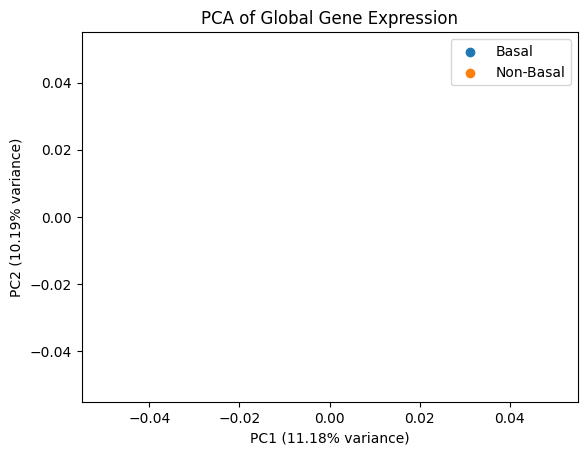

In [6]:
import matplotlib.pyplot as plt

for subtype in ["Basal", "Non-Basal"]:
    subset = pca_df[pca_df["Subtype"] == subtype]
    plt.scatter(subset["PC1"], subset["PC2"], label=subtype)

plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)")
plt.legend()
plt.title("PCA of Global Gene Expression")
plt.show()


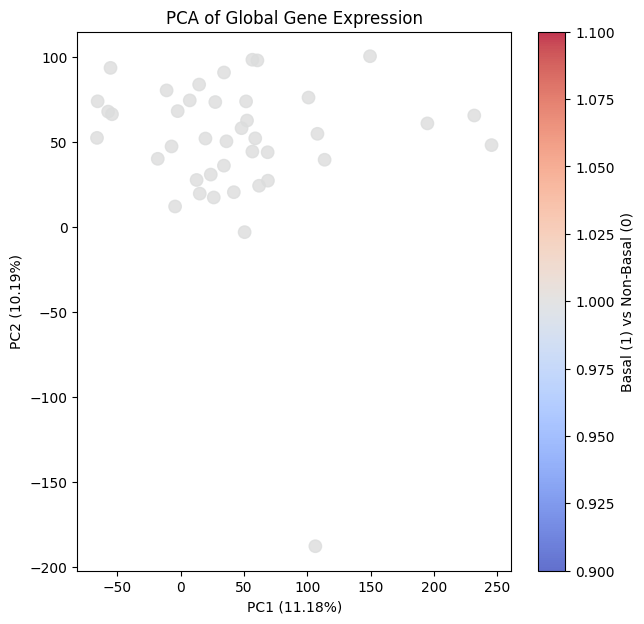

In [7]:
plt.figure(figsize=(7,7))


pca_df['Basal_Status'] = pca_df['Subtype'].map({'basal': 1, 'non-basal': 0})

plt.scatter(
    pca_df["PC1"],
    pca_df["PC2"],
    c=pca_df["Basal_Status"],
    cmap="coolwarm",
    s=80,
    alpha=0.8
)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")
plt.colorbar(label="Basal (1) vs Non-Basal (0)")
plt.title("PCA of Global Gene Expression")
plt.show()

(-0.1, 0.1)

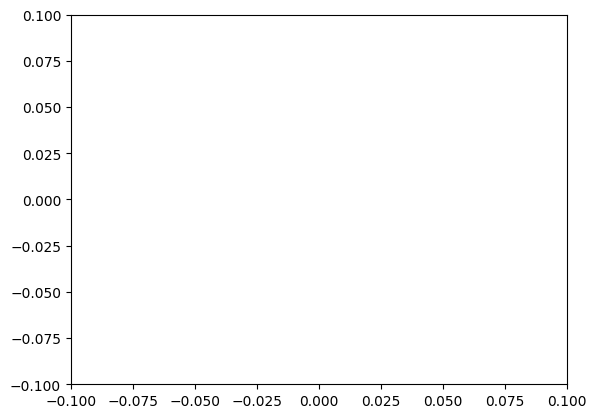

In [8]:
plt.xlim(-0.1, 0.1)
plt.ylim(-0.1, 0.1)


In [9]:
pca_df[["PC1","PC2"]].head(10)


,PC1,PC2
0,-99.952221,-97.843695
1,-115.598325,-50.104866
2,-71.105810,-132.759507
3,-104.044899,-48.367470
4,-119.063994,-49.088821
5,-78.695443,-51.332724
6,-95.979330,-62.517099
7,-130.335375,-36.320170
8,-151.292708,-38.722642
9,-122.775463,-55.680685


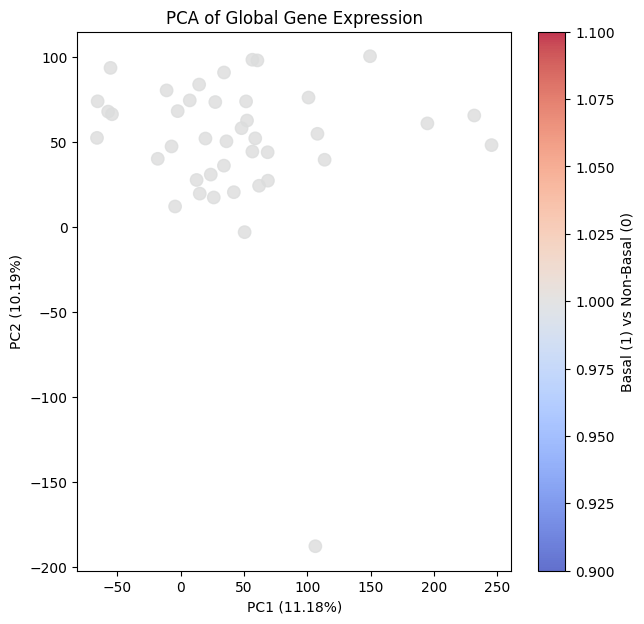

In [10]:
plt.figure(figsize=(7,7))


pca_df['Basal_Status'] = pca_df['Subtype'].map({'basal': 1, 'non-basal': 0})

plt.scatter(
    pca_df["PC1"],
    pca_df["PC2"],
    c=pca_df["Basal_Status"],
    cmap="coolwarm",
    s=80,
    alpha=0.8
)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")
plt.colorbar(label="Basal (1) vs Non-Basal (0)")
plt.title("PCA of Global Gene Expression")
plt.show()

In [14]:
import pandas as pd

metadata_df = pd.DataFrame(df['type'])
metadata_df.index.name = 'sample_id'
metadata_df.rename(columns={'type': 'subtype'}, inplace=True)

expression_df = df.drop(columns=['type'])
expression_df.index.name = 'sample_id'

basal_samples = metadata_df[metadata_df['subtype'] == 'basal'].index
non_basal_samples = metadata_df[metadata_df['subtype'] != 'basal'].index


basal_expr = expression_df.loc[basal_samples]
non_basal_expr = expression_df.loc[non_basal_samples]

In [16]:
import numpy as np
from scipy import stats

results = []

for gene in expression_df.columns:
    basal_values = basal_expr[gene]
    non_basal_values = non_basal_expr[gene]

    mean_basal = np.mean(basal_values)
    mean_non_basal = np.mean(non_basal_values)


    log2fc = np.log2((mean_basal + 1e-6) / (mean_non_basal + 1e-6))


    t_stat, p_value = stats.ttest_ind(basal_values, non_basal_values)

    results.append([gene, mean_basal, mean_non_basal, log2fc, p_value])

In [19]:
results_df = pd.DataFrame(results, columns=['Gene', 'Mean_Basal', 'Mean_Non_Basal', 'Log2FC', 'P_Value'])

top_basal = results_df.sort_values('Log2FC', ascending=False).head(20)['Gene']

top_non_basal = results_df.sort_values('Log2FC', ascending=True).head(20)['Gene']

top_genes = list(top_basal) + list(top_non_basal)

In [21]:
heatmap_data = expression_df[top_genes]
heatmap_data = heatmap_data.T

In [22]:

sample_colors = metadata_df['subtype'].map({'basal': 'orange', 'non-basal': 'blue'})


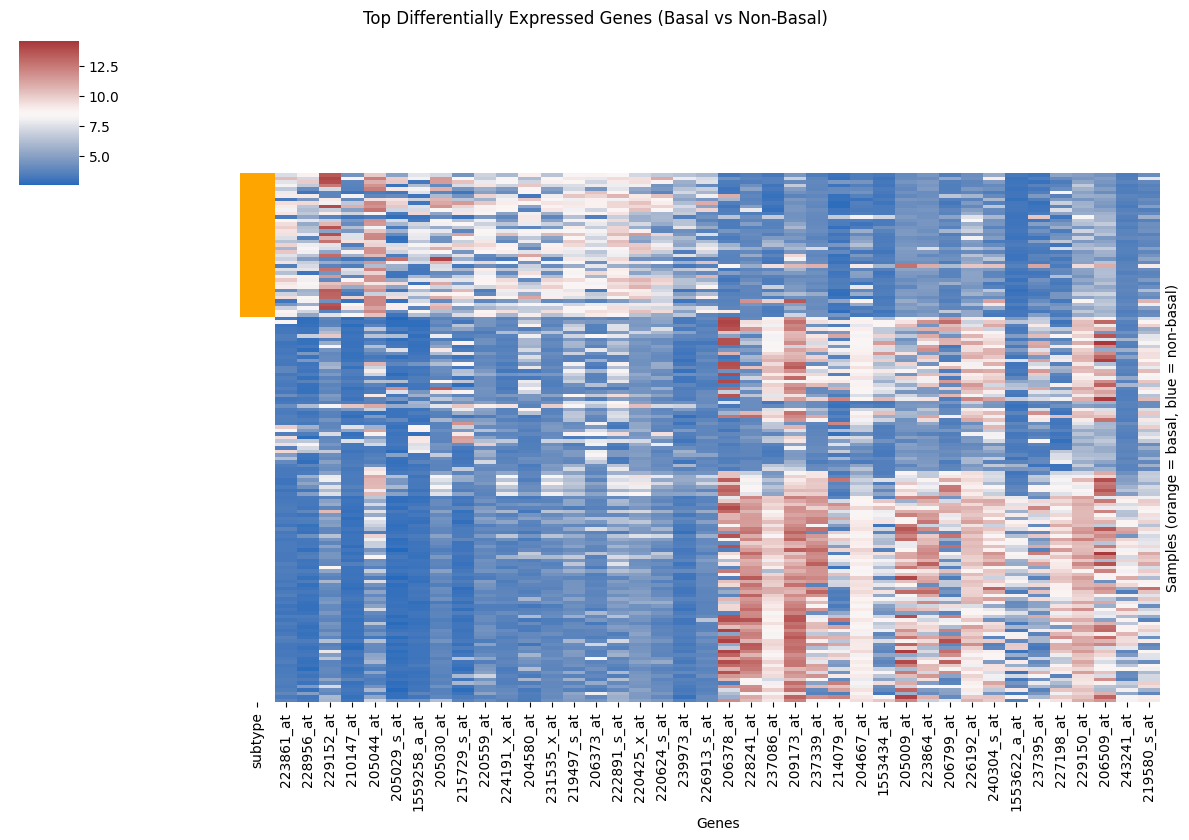

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sample_colors = metadata_df['subtype'].map({'basal': 'orange', 'non-basal': 'blue'})

heatmap_data_for_plot = heatmap_data.copy()

heatmap_data_for_plot = heatmap_data_for_plot.T

g = sns.clustermap(
    heatmap_data_for_plot,
    cmap='vlag',
    yticklabels=False,
    row_colors=sample_colors,
    row_cluster=False,
    col_cluster=False,
    figsize=(12, 8)
)

g.fig.suptitle("Top Differentially Expressed Genes (Basal vs Non-Basal)", y=1.02)
g.ax_heatmap.set_xlabel("Genes")
g.ax_heatmap.set_ylabel("Samples (orange = basal, blue = non-basal)")

plt.show()

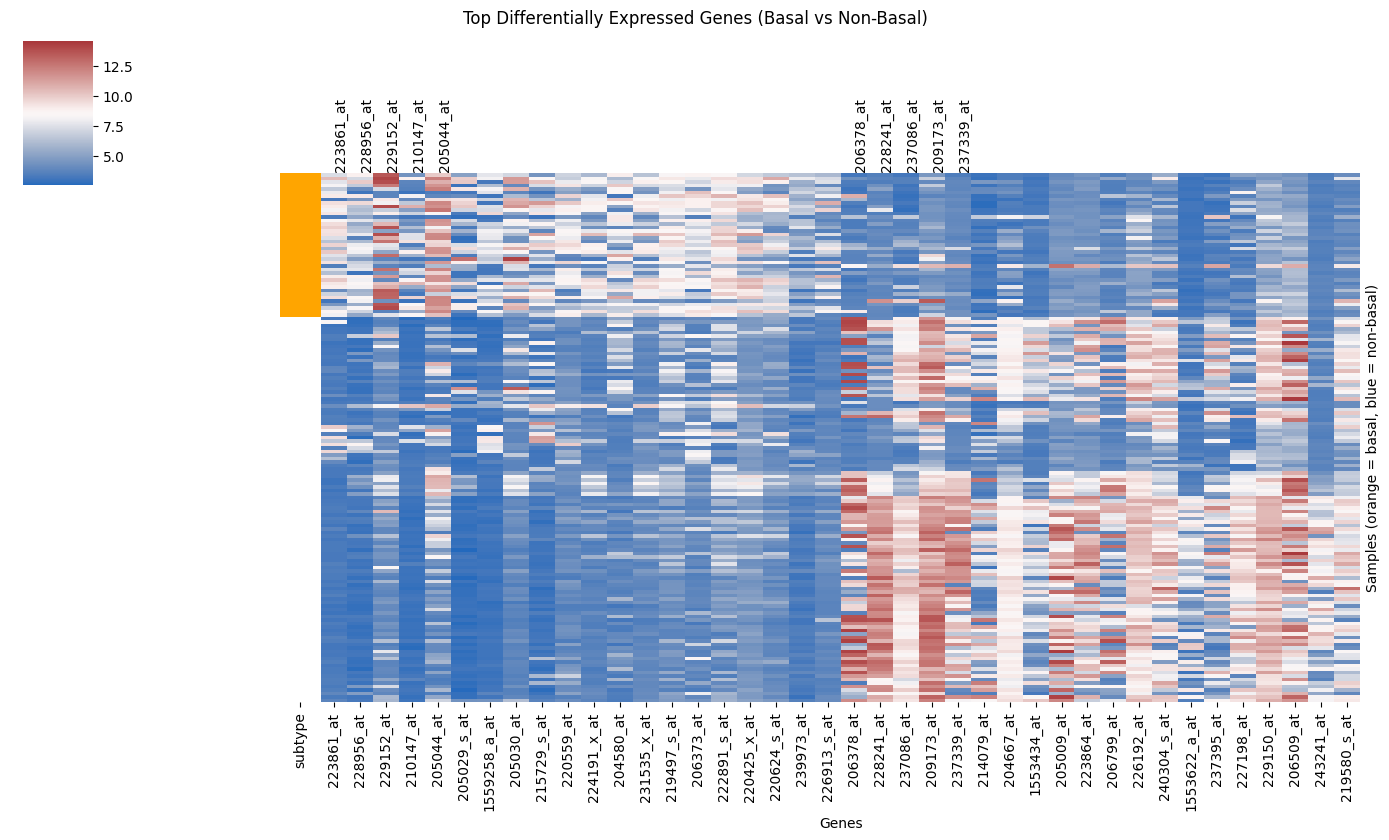

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Step 1: Get top genes ---
top_basal = results_df.sort_values('Log2FC', ascending=False).head(5)['Gene']
top_non_basal = results_df.sort_values('Log2FC', ascending=True).head(5)['Gene']

# Combine for highlighting
highlight_genes = list(top_basal) + list(top_non_basal)

# Subset heatmap data to top 40 genes, but we will mark top 10
heatmap_data_for_plot = heatmap_data.copy()  # your top 40 genes
heatmap_data_for_plot = heatmap_data_for_plot.T # Transpose to make samples as rows, genes as columns

# --- Step 2: Row colors for basal vs non-basal ---
sample_colors = metadata_df['subtype'].map({'basal': 'orange', 'non-basal': 'blue'})

# --- Step 3: Plot heatmap using clustermap for row_colors functionality ---
g = sns.clustermap(
    heatmap_data_for_plot,
    cmap='vlag',
    yticklabels=False,
    row_colors=sample_colors,
    row_cluster=False,
    col_cluster=False,
    figsize=(14, 8) # Set the overall figure size for clustermap
)

# Set the title and labels on the ClusterGrid object
g.fig.suptitle("Top Differentially Expressed Genes (Basal vs Non-Basal)", y=1.02)
g.ax_heatmap.set_xlabel("Genes")
g.ax_heatmap.set_ylabel("Samples (orange = basal, blue = non-basal)")

# --- Step 4: Annotate top genes ---
# The annotations need to be placed on the heatmap axis within the ClusterGrid
for gene in highlight_genes:
    idx = heatmap_data_for_plot.columns.get_loc(gene)
    g.ax_heatmap.text(idx + 0.5, -0.5, gene, rotation=90, verticalalignment='bottom', fontsize=10, color='black')

plt.show()

This heatmap is similar to the previous one created using the top 30 genes based on absolute mean differences, with the key difference being that this version incorporates statistical testing. While the overall patterns and blocks are largely consistent, some genes show slightly different expression levels. Overall, these results confirm the earlier analysis, reinforcing that the genes in each block likely contribute to the separation between basal and non-basal breast cancer.